# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

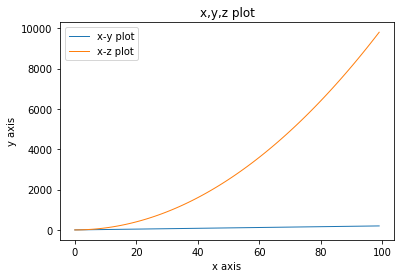

In [3]:
# Method 1
plt.plot(x, y, label='x-y plot', linewidth = 1) 
plt.plot(x, z, label='x-z plot', linewidth = 1)


plt.xlabel('x axis') # label in x axis
plt.ylabel('y axis') # label in y axis

plt.title("x,y,z plot")
plt.legend()
plt.show() 

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

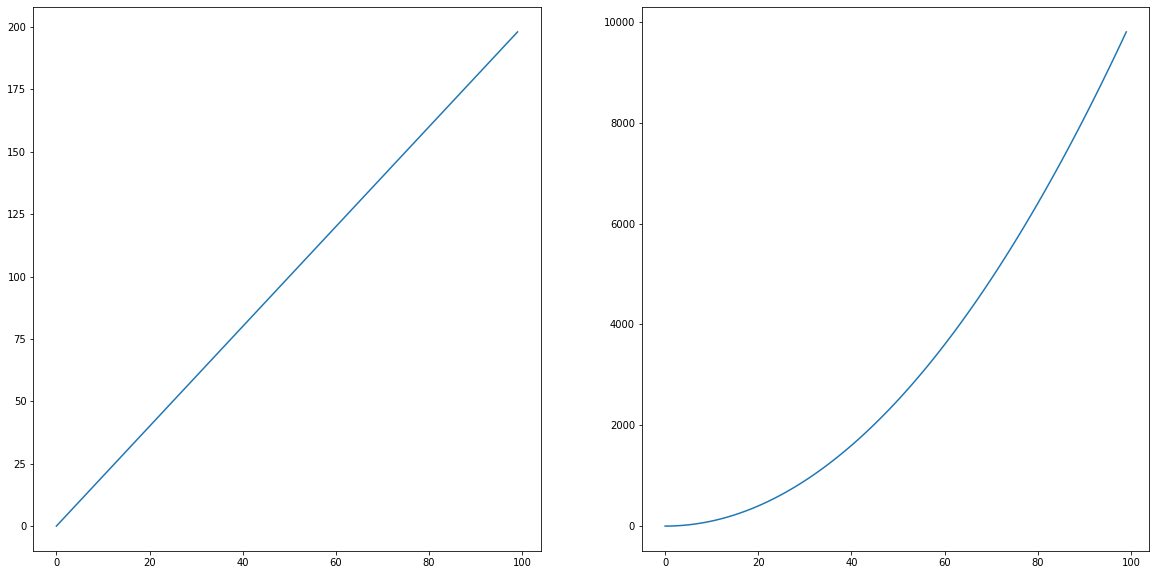

In [4]:
# Method 2
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].plot(x,y)
axs[1].plot(x,z)

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

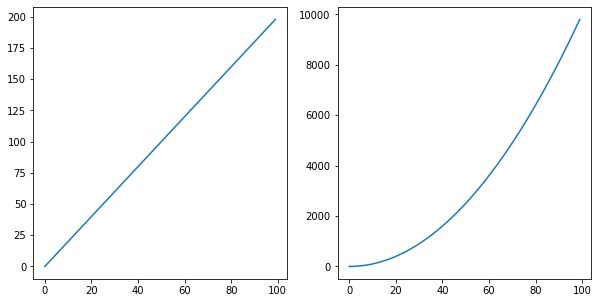

In [5]:
# your code here
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(x,y)
axs[1].plot(x,z)

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

AttributeError: 'list' object has no attribute 'set_yscale'

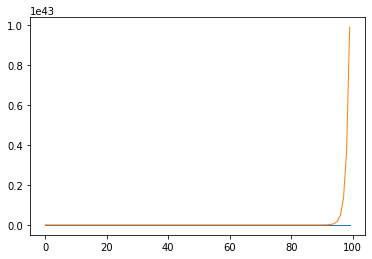

In [6]:
# your code here
x = np.arange(0,100)
y1 = x**2
y2 = np.exp(x)

plot1 = plt.plot(x, y1, linewidth = 1)
plot2 = plt.plot(x, y2, linewidth = 1).set_yscale('log') 

plt.xlabel('x axis') # label in x axis
plt.ylabel('y axis') # label in y axis

plt.show()

#### As a bonus challenge, try to add a legend to the plot.

In [7]:
# your code here
x = np.arange(0,100)
y1 = x1**2
y2 = np.exp(x)

plt.plot(x, y1, label='linear', linewidth = 1)
plt.plot(x, y2, label='exponential', linewidth = 1) 

plt.xlabel('x axis') # label in x axis
plt.ylabel('y axis') # label in y axis

plt.legend()
plt.show()

NameError: name 'x1' is not defined

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [8]:
# your code here
fitbit = pd.read_csv('Fitbit2.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

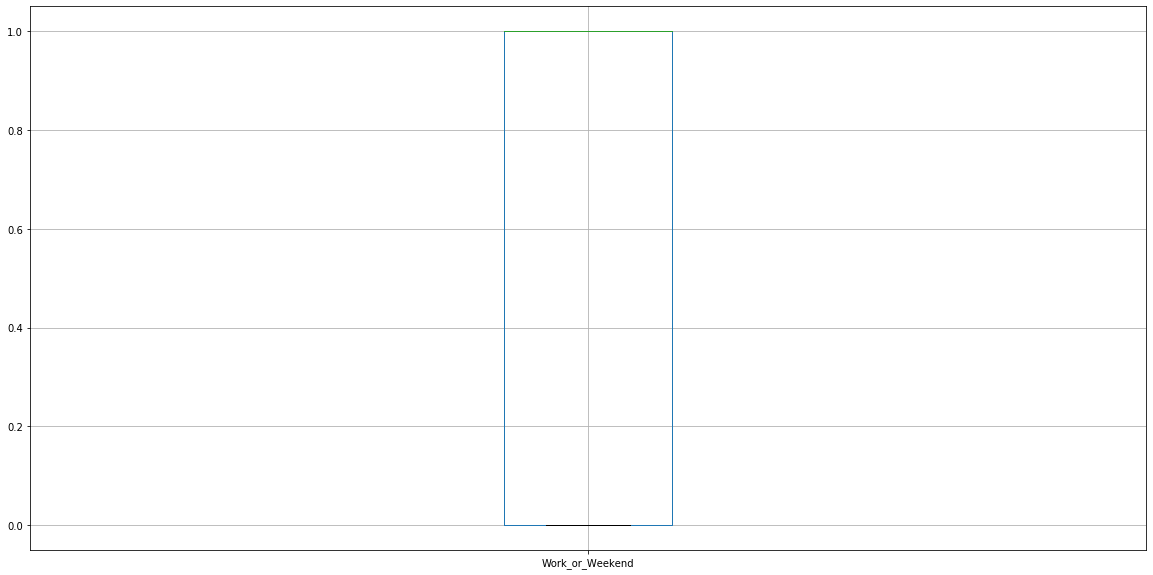

In [9]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here

#fitbit.boxplot(column = "Months_encoded", figsize = (20,10))
#plt.savefig('months.png')

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here

fitbit.boxplot(column="Work_or_Weekend", figsize = (20,10))
plt.savefig('work.png')


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

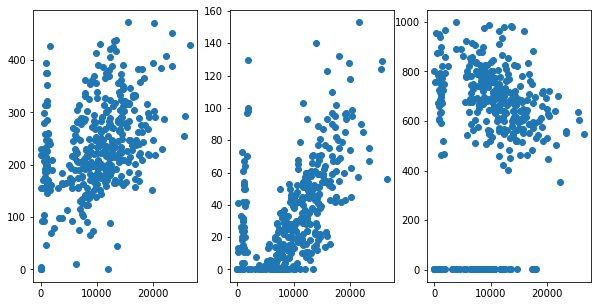

In [10]:
# your code here
fig,axs = plt.subplots(1,3,figsize = (10,5))

columns = ['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']
for x,y in zip(range(len(columns)),columns):
        axs[x].scatter(fitbit['Steps'],fitbit[y])

plt.show()
    

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [12]:
# your code here
titanic = pd.read_csv('titanic.csv')
titanic


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [13]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [19]:
# NUMERICAL VARIABLES
# your code here
num = titanic.select_dtypes('int64', 'float64')
num

,PassengerId,Pclass,SibSp,Parch
0,1,3,1,0
1,2,1,1,0
2,3,3,0,0
3,4,1,1,0
4,5,3,0,0
...,...,...,...,...
1304,1305,3,0,0
1305,1306,1,0,0
1306,1307,3,0,0
1307,1308,3,0,0


In [18]:
# CATEGORICAL VARIABLES
# your code here
cat = titanic.select_dtypes('object')
cat

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

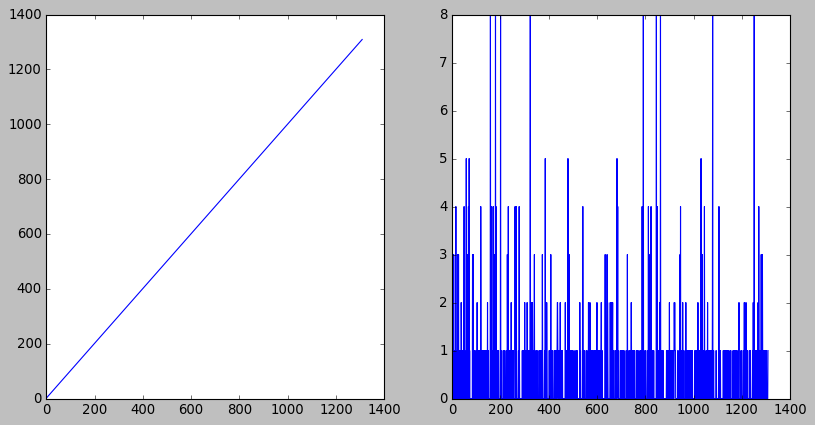

In [64]:
# your code here
fig, axs = plt.subplots(1, 2, figsize = (12, 6))
axs[0].plot(titanic['PassengerId'])
axs[1].plot(titanic['SibSp'])

plt.style.use('classic')
plt.show()


#### Use the right visulalization to show the distribution of column `Age`.

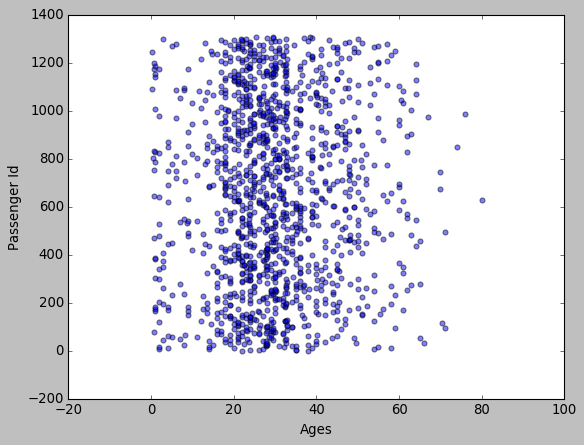

In [85]:
# your code here
plt.scatter(titanic['Age'],titanic['PassengerId'], alpha = 0.5)

plt.xlabel('Ages')
plt.ylabel('Passenger Id')

plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

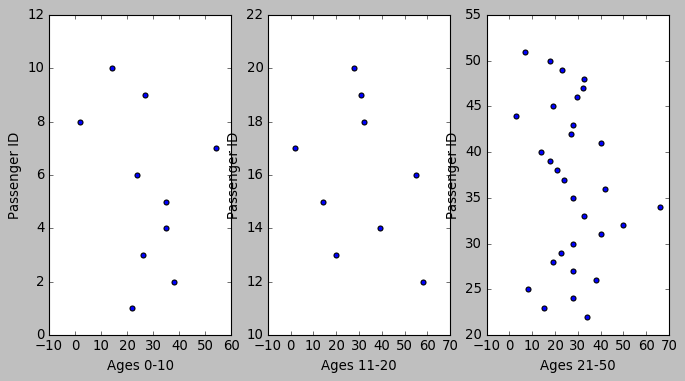

In [92]:
# your code here
fig, axs = plt.subplots(1, 3, figsize=(10, 5)) 
axs[0].scatter(titanic['Age'][0:10], titanic['PassengerId'][0:10]) 
axs[1].scatter(titanic['Age'][11:20], titanic['PassengerId'][11:20]) 
axs[2].scatter(titanic['Age'][21:51], titanic['PassengerId'][21:51])

axs[0].set(xlabel="Ages 0-10", ylabel="Passenger ID")
axs[1].set(xlabel="Ages 11-20", ylabel="Passenger ID")
axs[2].set(xlabel="Ages 21-50", ylabel="Passenger ID")

plt.show()

#### How does the bin size affect your plot?

In [ ]:
"""
your comments here
After analysing each individual plot, we can observe that there are more passengers 
between 21 and 50 years old, where most of the passengers were aging around 30 years old.
There's something wrong with my x axis scale though.
"""


#### Use seaborn to show the distribution of column `Age`.

In [93]:
# your code here
import seaborn as sns

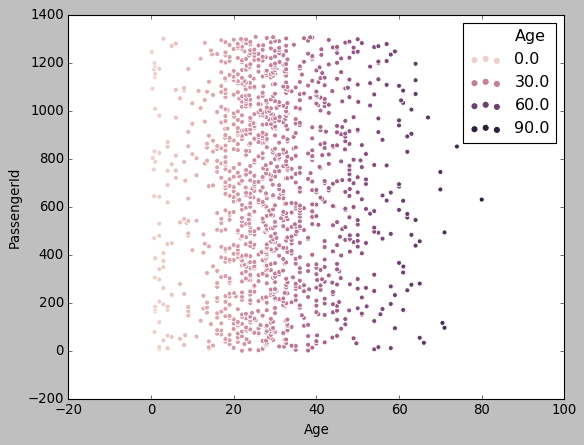

In [95]:
sns.scatterplot(x="Age", y="PassengerId", hue="Age", data=titanic)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

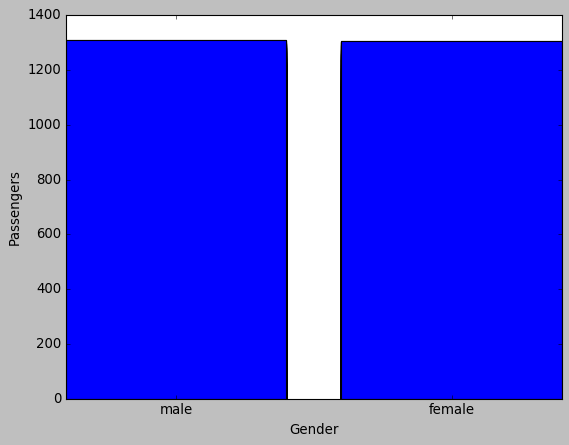

In [98]:
# Method 1 - matplotlib
# your code here
plt.bar(titanic['Gender'], titanic['PassengerId'])
plt.xlabel('Gender')
plt.ylabel('Passengers')
plt.show()

[Text(0, 0, 'male'), Text(0, 0, 'female')]

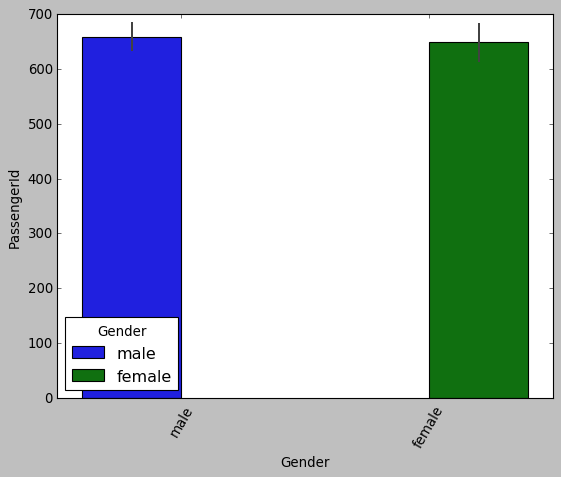

In [105]:
# Method 2 - seaborn
# your code here
ax = sns.barplot(x="Gender", y="PassengerId", hue="Gender", data = titanic)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

#### Use the right plot to visualize the column `Pclass`.

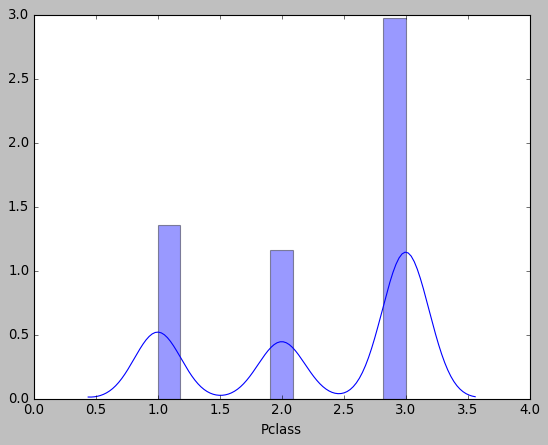

In [108]:
# your code here
sns.distplot(titanic['Pclass'])

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

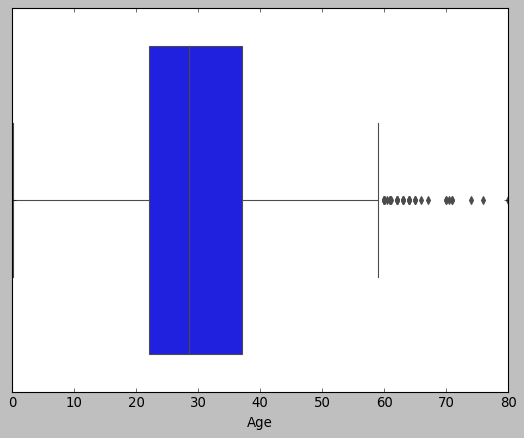

In [140]:
# your code here
sns.boxplot(x="Age", data = titanic)


In [ ]:
"""
your comments here
the ends of the box are the upper and lower quartiles, so the box spans the interquartile range.
the median is marked by a vertical line inside the box, which in this case is close to 30 years old.
the whiskers are the two lines outside the box that extend to the highest (60) and lowest observations (0).
"""

#### What does the last plot tell you about the feature `Age`?

In [129]:
"""
your comments here
The average age is 30 years old. 
"""

'\nyour comments here\nI am not able to read the boxplot due to the amount of data. \n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

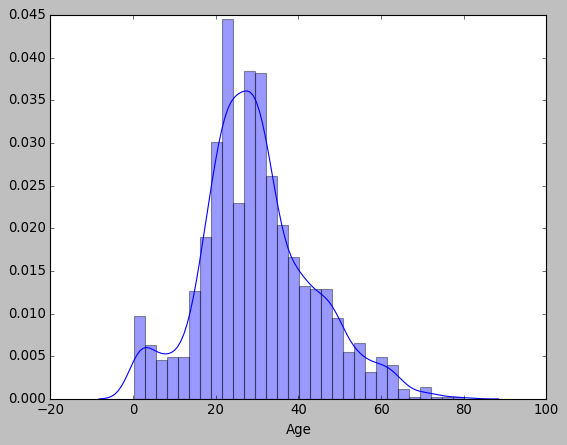

In [130]:
# your code here
sns.distplot(titanic['Age'])

#### What additional information does the last plot provide about feature `Age`?

In [131]:
"""
your comments here
Most of the passengers have ages between 20 and 30 years old. 

"""

'\nyour comments here\nMost of the passengers have ages between 20 and 30 years old. \n\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

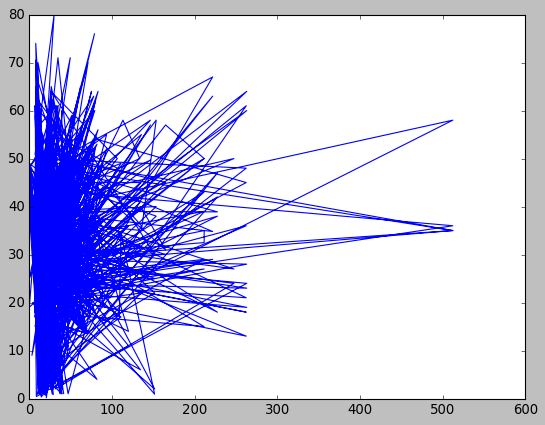

In [136]:
# Method 1 - matplotlib
# your code here
plt.plot(titanic['Fare'], titanic['Age'])
plt.show()


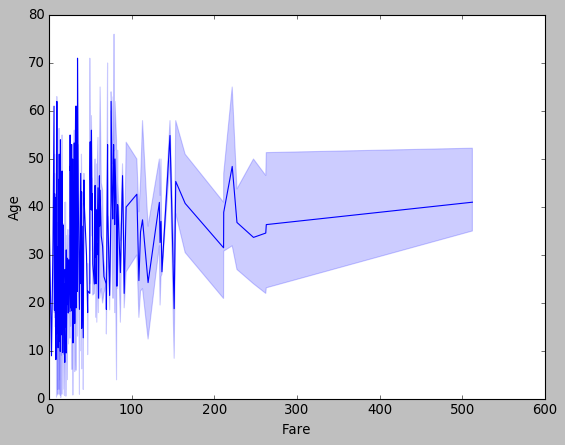

In [134]:
# Method 2 - seaborn
# your code here
sns.lineplot(x = titanic['Fare'], y = titanic['Age'])


#### Plot the correlation matrix using seaborn.

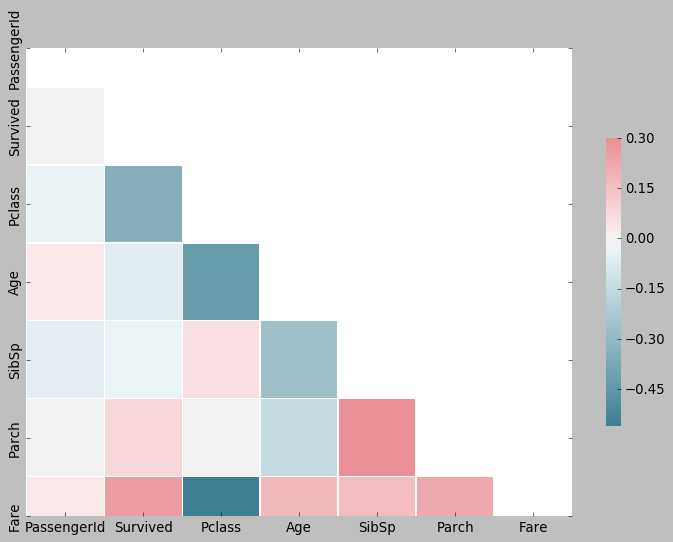

In [137]:
# your code here
corr = titanic.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### What are the most correlated features?

In [ ]:
"""
your comments here
Pclass and Fare
Pclass and Age
Parch adn Sibsp
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

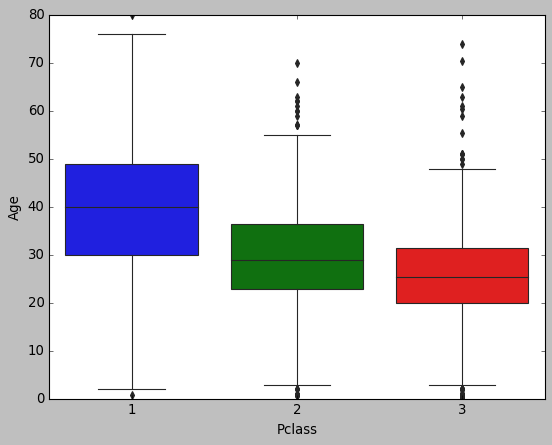

In [139]:
# your code here
sns.boxplot(x="Pclass", y="Age", data = titanic)


#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here
sns.FacetGrid(titanic, row = 'Gender', col ='Age')
